# Vehicle Insurance Claim Fraud Detection (Classification)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing Data

In [2]:
# Read Data
vic = pd.read_csv('Datasets/fraud_oracle.csv')
vic.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
vic.shape

(15420, 33)

In [4]:
vic.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


This dataset has 9 numerical features

In [5]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
# Checking Data for find missing value
vic.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
vic.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
vic.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [9]:
vic_temp = vic.copy()

In [10]:
vic_temp[vic_temp['Age'] == 0].shape

(320, 33)

In [11]:
vic_temp[vic_temp['Age'] == 0]['AgeOfPolicyHolder'].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [12]:
# Because 320 of the samples have an age of zero, we fill them with the mean of 16 and 17
vic_temp['Age'] = vic_temp['Age'].replace(0, 16.5)

In [13]:
vic_temp[vic_temp['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [14]:
# Because Day Of Week Claimed and Month Claimed of above sample is 0 we remove it.
vic_temp.drop(1516, axis=0, inplace=True)
vic_temp.shape

(15419, 33)

In [15]:
vic_temp['PolicyNumber'].value_counts()

1        1
10361    1
10273    1
10274    1
10275    1
        ..
5146     1
5147     1
5148     1
5149     1
15420    1
Name: PolicyNumber, Length: 15419, dtype: int64

In [16]:
# Beacuse Policy number is a row number remove this column
vic_temp.drop(columns='PolicyNumber', inplace=True)
vic_temp.shape

(15419, 32)

In [17]:
corr_mat = vic_temp.corr()
corr_mat

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275366,-0.007719,-0.011872,0.005340,-0.004000,-0.016834,-0.003949
WeekOfMonthClaimed,0.275366,1.000000,0.001411,-0.005783,0.009033,0.005442,-0.000086,0.012082
Age,-0.007719,0.001411,1.000000,-0.027509,-0.006357,0.069036,0.001264,0.022278
FraudFound_P,-0.011872,-0.005783,-0.027509,1.000000,-0.007529,0.017345,0.007259,-0.024778
RepNumber,0.005340,0.009033,-0.006357,-0.007529,1.000000,0.000525,0.011072,0.009438
Deductible,-0.004000,0.005442,0.069036,0.017345,0.000525,1.000000,0.003882,-0.001182
DriverRating,-0.016834,-0.000086,0.001264,0.007259,0.011072,0.003882,1.000000,-0.013922
Year,-0.003949,0.012082,0.022278,-0.024778,0.009438,-0.001182,-0.013922,1.000000


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_13724/3087650146.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

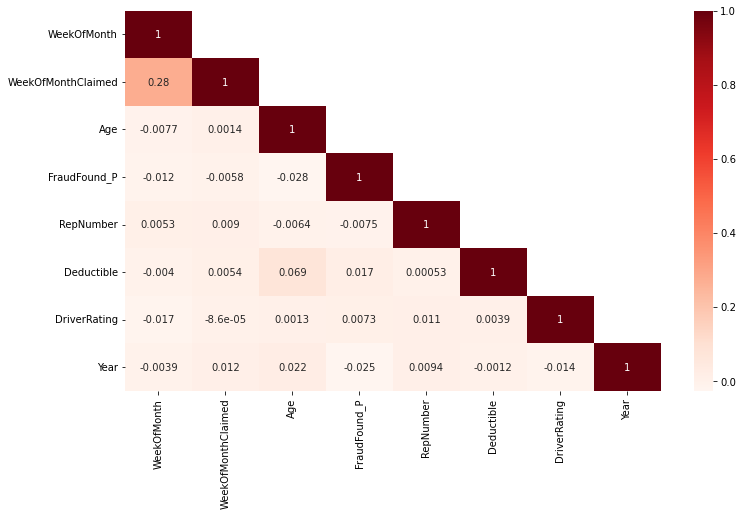

In [18]:
plt.figure(figsize=(12, 7))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [19]:
for labels, content in vic_temp.items():
    if pd.api.types.is_string_dtype(content):
        vic_temp[labels] = content.astype('category').cat.as_ordered()

In [20]:
vic_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15419 non-null  category
 1   WeekOfMonth           15419 non-null  int64   
 2   DayOfWeek             15419 non-null  category
 3   Make                  15419 non-null  category
 4   AccidentArea          15419 non-null  category
 5   DayOfWeekClaimed      15419 non-null  category
 6   MonthClaimed          15419 non-null  category
 7   WeekOfMonthClaimed    15419 non-null  int64   
 8   Sex                   15419 non-null  category
 9   MaritalStatus         15419 non-null  category
 10  Age                   15419 non-null  float64 
 11  Fault                 15419 non-null  category
 12  PolicyType            15419 non-null  category
 13  VehicleCategory       15419 non-null  category
 14  VehiclePrice          15419 non-null  category
 15  Fr

In [21]:
for labels, content in vic_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        vic_temp[labels] = pd.Categorical(content).codes

In [22]:
vic_temp.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [23]:
vic_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,15419.0,5.532136,3.409703,0.0,3.0,6.0,8.0,11.0
WeekOfMonth,15419.0,2.788637,1.287611,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15419.0,2.915883,2.055494,0.0,1.0,3.0,5.0,6.0
Make,15419.0,10.114858,5.282987,0.0,6.0,9.0,13.0,18.0
AccidentArea,15419.0,0.896426,0.304716,0.0,1.0,1.0,1.0,1.0
DayOfWeekClaimed,15419.0,3.203061,2.273766,0.0,1.0,4.0,5.0,6.0
MonthClaimed,15419.0,5.596148,3.410648,0.0,3.0,6.0,9.0,11.0
WeekOfMonthClaimed,15419.0,2.694079,1.259082,1.0,2.0,3.0,4.0,5.0
Sex,15419.0,0.843051,0.363765,0.0,1.0,1.0,1.0,1.0
MaritalStatus,15419.0,1.303327,0.475113,0.0,1.0,1.0,2.0,3.0


In [24]:
corr_mat = vic_temp.corr()
corr_mat

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010625,-0.009549,0.000539,-0.000074,-0.025776,0.724419,0.042016,0.002916,-0.003956,...,-0.029181,0.010748,0.009986,-0.002107,0.015757,-0.010878,-0.007517,0.001341,0.028726,0.020484
WeekOfMonth,0.010625,1.000000,-0.011668,-0.001665,0.009002,0.015082,0.009982,0.275366,0.005332,0.019671,...,-0.014871,-0.002898,0.013020,0.013711,0.006472,-0.002867,0.008338,0.002511,-0.003949,-0.007818
DayOfWeek,-0.009549,-0.011668,1.000000,0.003321,0.006386,0.097647,-0.011997,-0.013954,-0.021214,-0.006547,...,0.004027,0.013165,-0.011908,0.000134,0.011516,-0.010873,-0.005148,0.001991,0.002549,0.014810
Make,0.000539,-0.001665,0.003321,1.000000,0.004127,-0.005187,0.010022,-0.007900,-0.026360,-0.010574,...,-0.052875,0.051961,-0.008083,-0.000490,-0.014913,-0.025168,-0.003390,-0.000226,0.010826,-0.019937
AccidentArea,-0.000074,0.009002,0.006386,0.004127,1.000000,-0.011394,-0.002618,0.006330,-0.033732,0.003321,...,-0.012278,0.007301,0.001722,-0.028385,-0.005214,0.005229,0.003755,-0.007856,0.002079,0.043560
DayOfWeekClaimed,-0.025776,0.015082,0.097647,-0.005187,-0.011394,1.000000,-0.015803,0.013635,-0.000203,-0.018055,...,-0.006408,0.008432,-0.018389,-0.001396,-0.015393,0.019484,0.011260,-0.010448,0.003512,-0.014472
MonthClaimed,0.724419,0.009982,-0.011997,0.010022,-0.002618,-0.015803,1.000000,0.032428,-0.002160,-0.007772,...,-0.021446,0.018572,0.013989,-0.008597,0.016148,0.001483,-0.013373,-0.001811,0.020948,0.028162
WeekOfMonthClaimed,0.042016,0.275366,-0.013954,-0.007900,0.006330,0.013635,0.032428,1.000000,0.003777,0.000411,...,0.004001,0.001091,0.023497,0.009363,-0.011326,-0.007022,-0.008322,0.008224,0.012082,0.013671
Sex,0.002916,0.005332,-0.021214,-0.026360,-0.033732,-0.000203,-0.002160,0.003777,1.000000,-0.114441,...,0.209081,0.065569,-0.007408,-0.005583,0.012685,0.001927,0.004429,0.000089,0.000444,-0.069729
MaritalStatus,-0.003956,0.019671,-0.006547,-0.010574,0.003321,-0.018055,-0.007772,0.000411,-0.114441,1.000000,...,-0.304444,-0.453924,0.011780,0.013870,0.007592,0.016658,-0.009557,-0.008284,-0.013893,0.048131


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_13724/1290100022.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

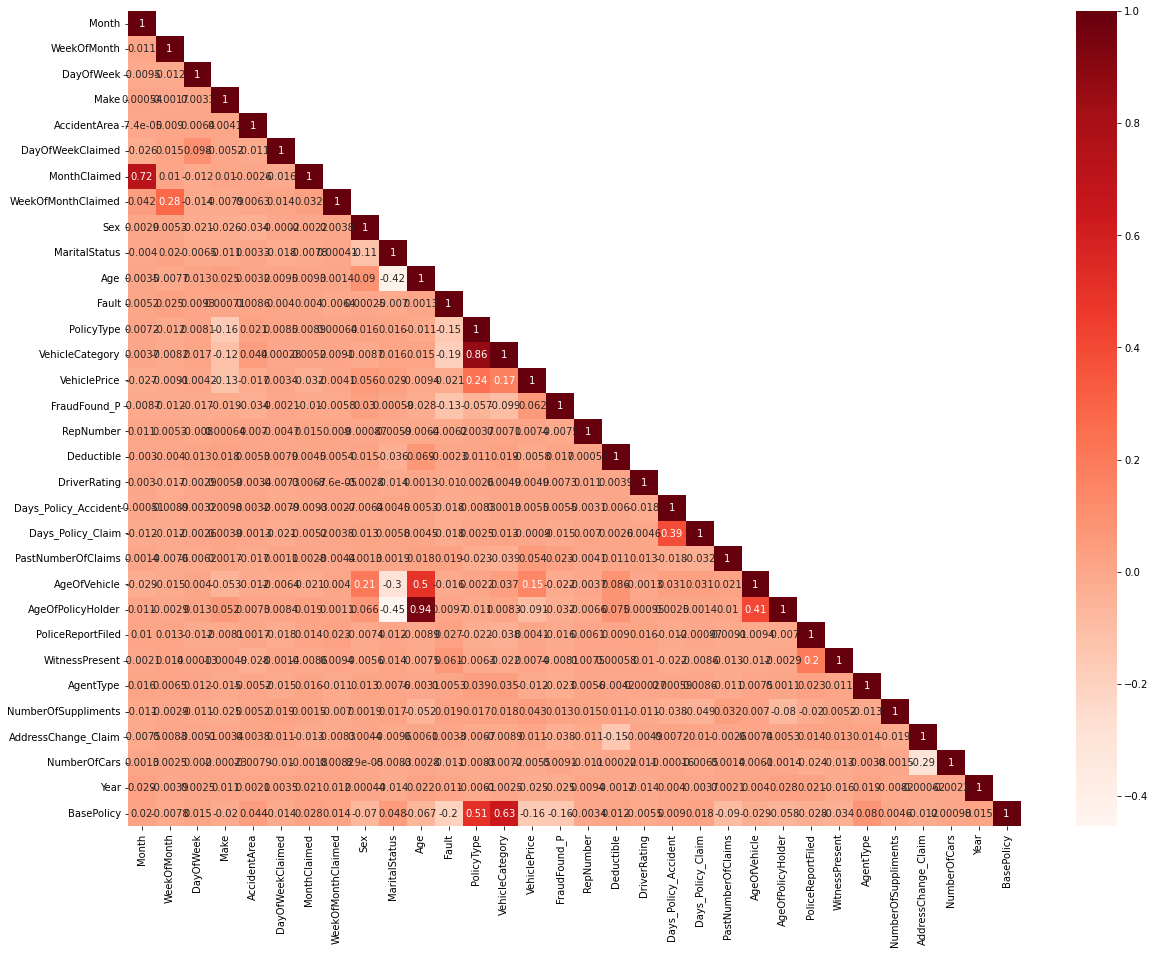

In [25]:
plt.figure(figsize=(20, 15))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

### Spliting Data

In [26]:
X = vic_temp.drop(columns='FraudFound_P')
y = vic_temp['FraudFound_P']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [28]:
y_train.shape

(12335,)

In [29]:
y_train.value_counts()

0    11597
1      738
Name: FraudFound_P, dtype: int64

#### Functions for Analysis a Model

In [30]:
model_name_test, accuracy_test, recall_test, precision_test, f1_test, roc_auc_test = [], [], [], [], [], []

In [37]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
def analysis_model_with_test(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_pred))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()

In [32]:
model_name_train, accuracy_train, recall_train, precision_train, f1_train, roc_auc_train = [], [], [], [], [], []

In [38]:
def analysis_model_with_train(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)

    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_pred))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    # ROC AUC
    fpr, tpr, _ = roc_curve(y_train, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()

### Training Model Without under and over sampling

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [35]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


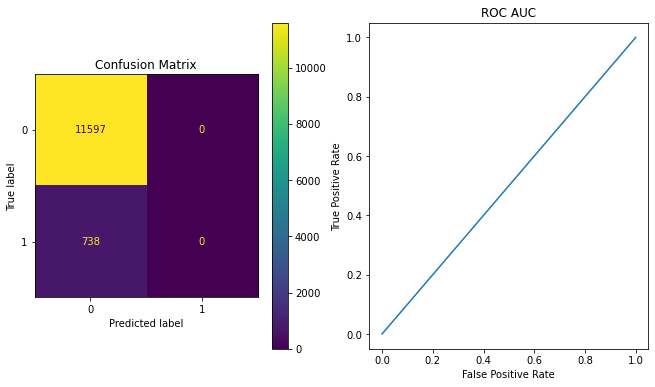

In [39]:
analysis_model_with_train('logistic_model', logistic_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


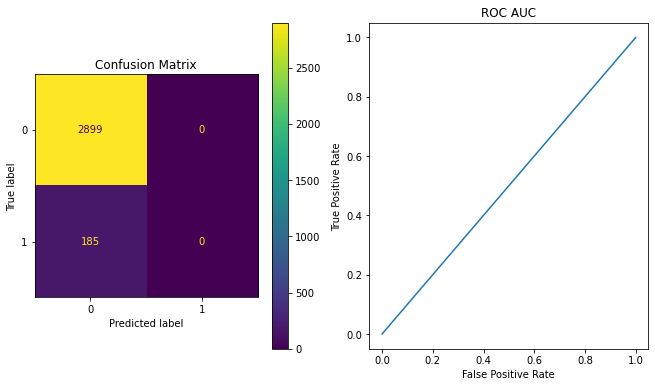

In [40]:
analysis_model_with_test('logistic_model', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [41]:
from sklearn.svm import LinearSVC
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [42]:
linearSVC_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


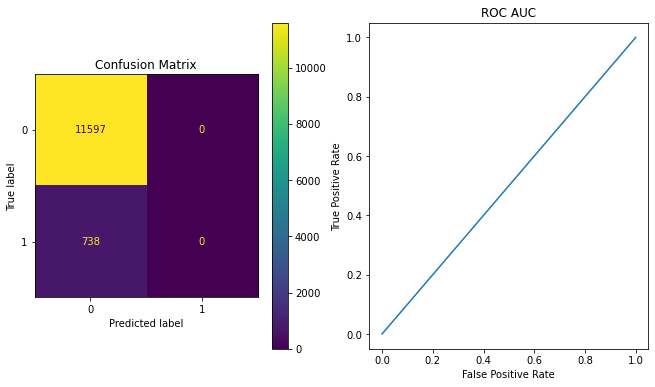

In [43]:
analysis_model_with_train('linearSVC_model', linearSVC_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


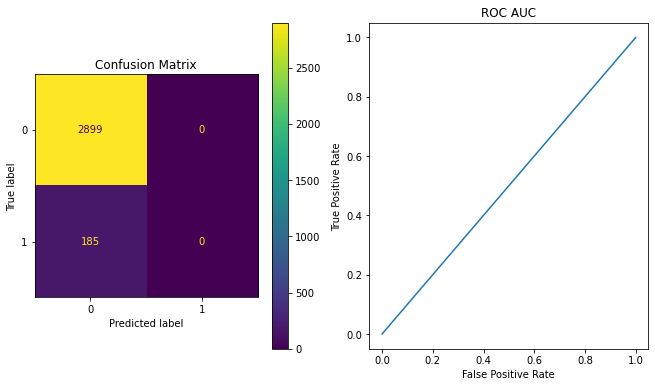

In [44]:
analysis_model_with_test('linearSVC_model', linearSVC_model, x_test, y_test)

#### SVC

In [45]:
from sklearn.svm import SVC
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))

In [46]:
poly_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Accuracy Score: 0.9588974462910418
F1 Score: 0.47893114080164434
Recall Score: 0.3157181571815718
Precision Score: 0.9914893617021276
ROC AUC: 0.6577728493935797


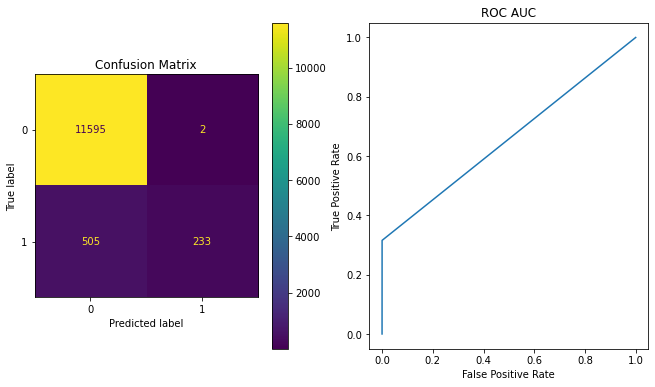

In [47]:
analysis_model_with_train('poly_kernel_svm_clf', poly_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9309338521400778
F1 Score: 0.11618257261410789
Recall Score: 0.07567567567567568
Precision Score: 0.25
ROC AUC: 0.5305939606388038


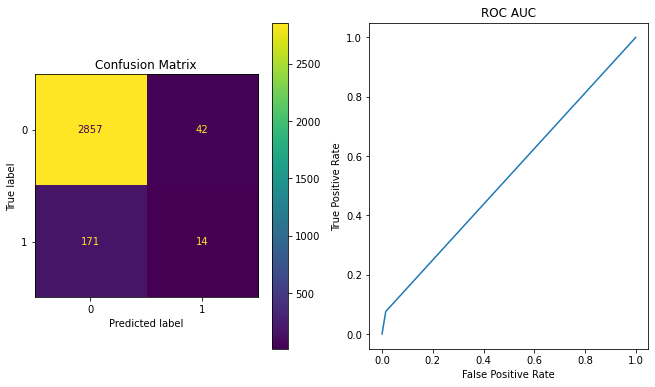

In [48]:
analysis_model_with_test('poly_kernel_svm_clf', poly_kernel_svm_clf, x_test, y_test)

In [49]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=5, C=0.001))

In [50]:
rbf_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


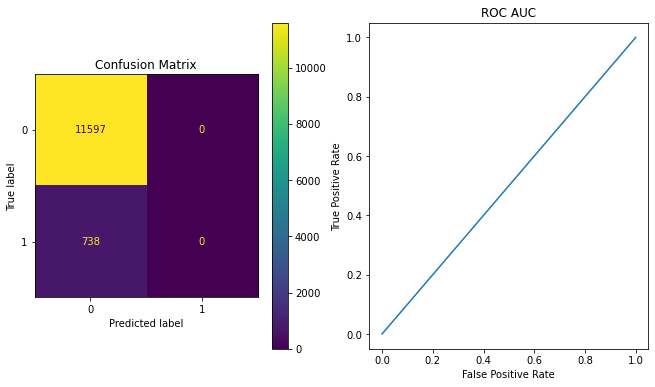

In [51]:
analysis_model_with_train('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


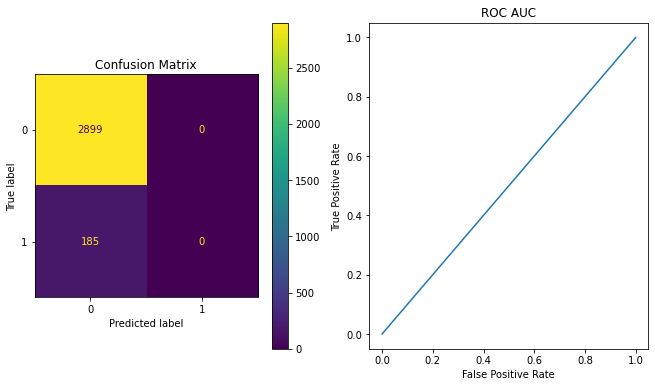

In [52]:
analysis_model_with_test('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_test, y_test)

### Training Model with Under Sampling

In [53]:
from imblearn.under_sampling import RandomUnderSampler

In [54]:
under_sampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
x_under, y_under = under_sampler.fit_resample(x_train, y_train)

#### Logistic Regression

In [55]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [56]:
logistic_model.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.7213188798554652
F1 Score: 0.571825121443442
Recall Score: 0.5582655826558266
Precision Score: 0.5860597439544808
ROC AUC: 0.6805555555555556


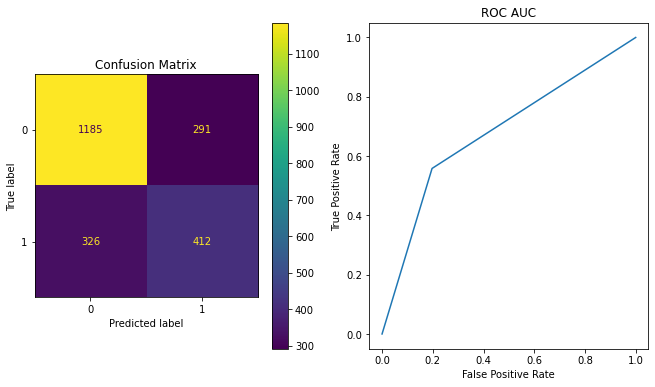

In [57]:
analysis_model_with_train('logistic_model_under', logistic_model, x_under, y_under)

Accuracy Score: 0.790207522697795
F1 Score: 0.23431952662721894
Recall Score: 0.5351351351351351
Precision Score: 0.15
ROC AUC: 0.6708100649804685


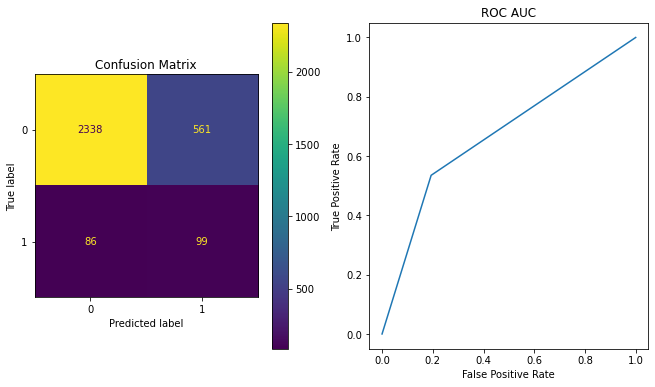

In [58]:
analysis_model_with_test('logistic_model_under', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [59]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [60]:
linearSVC_model.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.7280939476061428
F1 Score: 0.5836791147994467
Recall Score: 0.5718157181571816
Precision Score: 0.596045197740113
ROC AUC: 0.6890243902439025


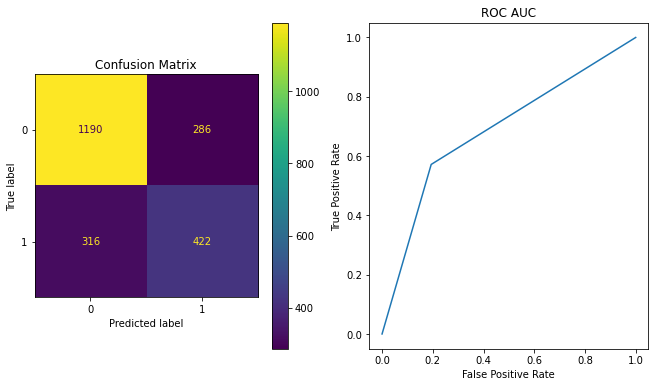

In [61]:
analysis_model_with_train('linearSVC_model_under', linearSVC_model, x_under, y_under)

Accuracy Score: 0.7921530479896238
F1 Score: 0.24142011834319527
Recall Score: 0.5513513513513514
Precision Score: 0.15454545454545454
ROC AUC: 0.6794355928885077


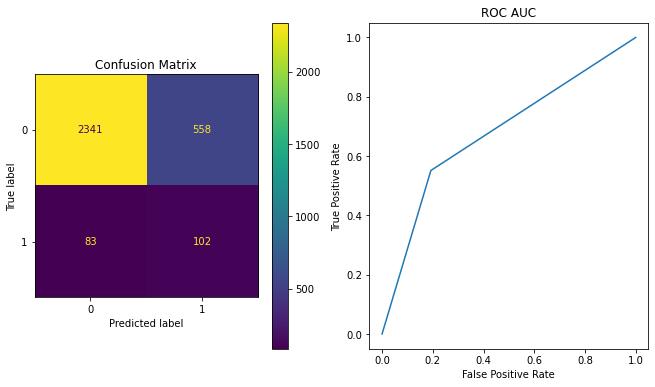

In [62]:
analysis_model_with_test('linearSVC_model_under', linearSVC_model, x_test, y_test)

#### SVC

In [63]:
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))

In [64]:
poly_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Accuracy Score: 0.9349593495934959
F1 Score: 0.9001386962552012
Recall Score: 0.8794037940379403
Precision Score: 0.921875
ROC AUC: 0.921070460704607


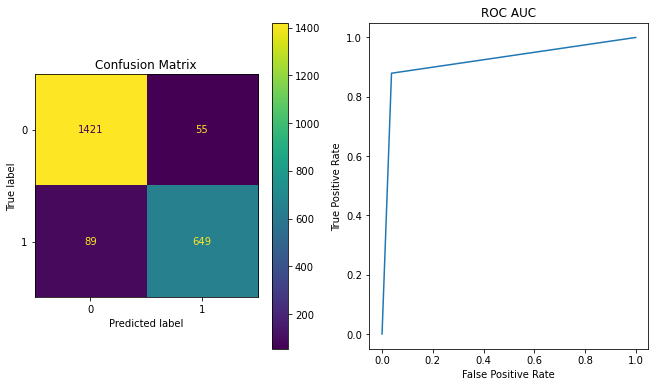

In [65]:
analysis_model_with_train('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.7772373540856031
F1 Score: 0.21485714285714286
Recall Score: 0.5081081081081081
Precision Score: 0.13623188405797101
ROC AUC: 0.6512599871344267


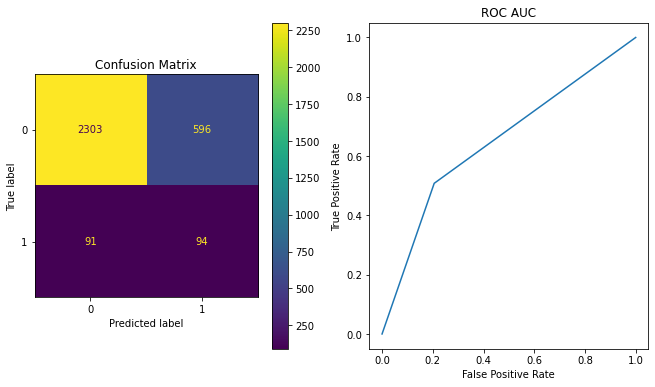

In [66]:
analysis_model_with_test('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_test, y_test)

In [67]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=5, C=0.001))

In [68]:
rbf_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

Accuracy Score: 0.6666666666666666
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


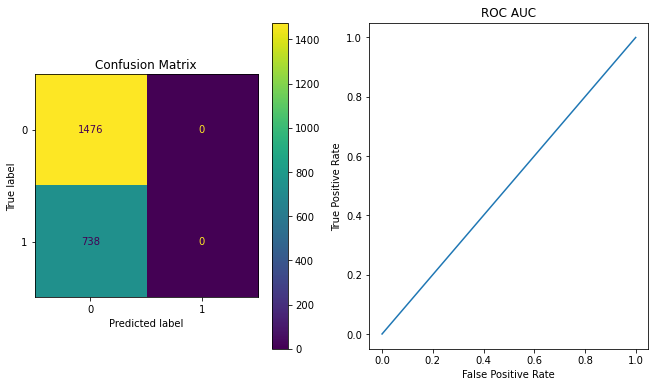

In [69]:
analysis_model_with_train('rbf_kernel_svm_clf_under', rbf_kernel_svm_clf, x_under, y_under)

In [70]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))

In [71]:
sigmoid_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid'))])

Accuracy Score: 0.6698283649503162
F1 Score: 0.472202166064982
Recall Score: 0.44308943089430897
Precision Score: 0.5054095826893354
ROC AUC: 0.6131436314363143


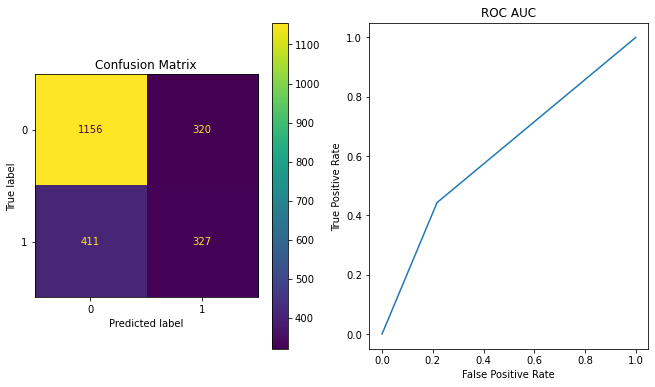

In [72]:
analysis_model_with_train('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.7937743190661478
F1 Score: 0.20895522388059704
Recall Score: 0.4540540540540541
Precision Score: 0.13570274636510501
ROC AUC: 0.6347538293726634


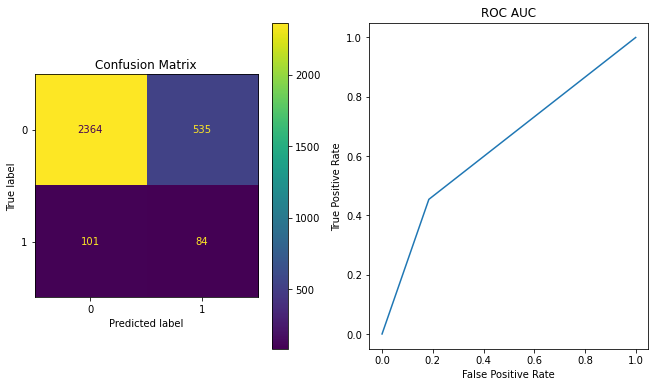

In [73]:
analysis_model_with_test('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_test, y_test)

#### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [95]:
decision_tree_clf.fit(x_under, y_under)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.6901535682023487
F1 Score: 0.6643835616438356
Recall Score: 0.9200542005420054
Precision Score: 0.5199081163859112
ROC AUC: 0.747628726287263


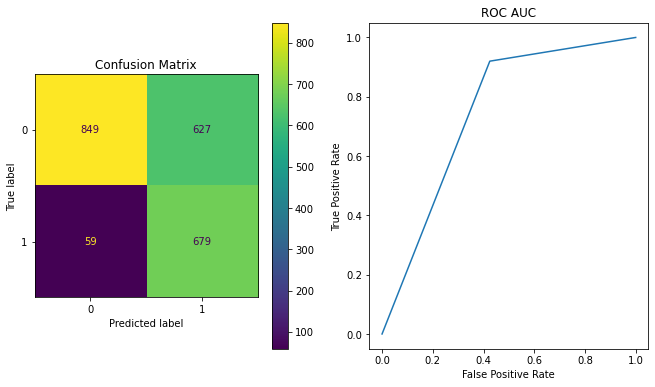

In [96]:
analysis_model_with_train('decision_tree_clf_under', decision_tree_clf, x_under, y_under)

Accuracy Score: 0.6057068741893644
F1 Score: 0.22151088348271444
Recall Score: 0.9351351351351351
Precision Score: 0.12563543936092955
ROC AUC: 0.7599097545285887


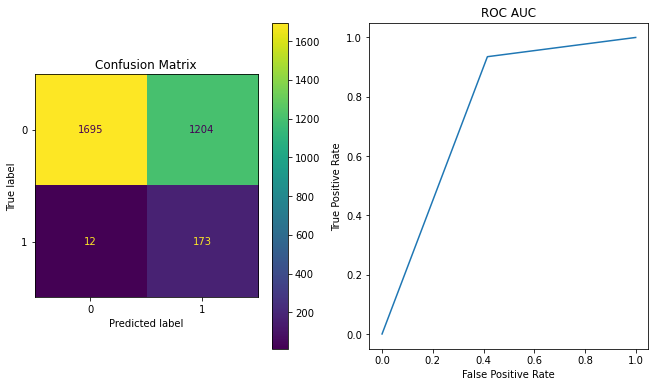

In [97]:
analysis_model_with_test('decision_tree_clf_under', decision_tree_clf, x_test, y_test)

#### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()

In [144]:
random_forest_clf.fit(x_under, y_under)

RandomForestClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


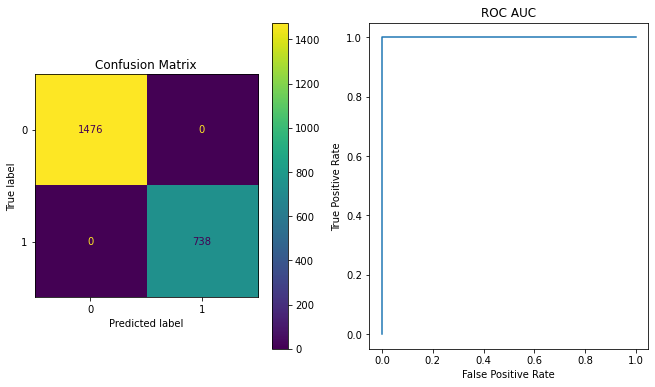

In [145]:
analysis_model_with_train('random_forest_clf_under', random_forest_clf, x_under, y_under)

Accuracy Score: 0.8190661478599222
F1 Score: 0.2619047619047619
Recall Score: 0.5351351351351351
Precision Score: 0.1733800350262697
ROC AUC: 0.6861601857117552


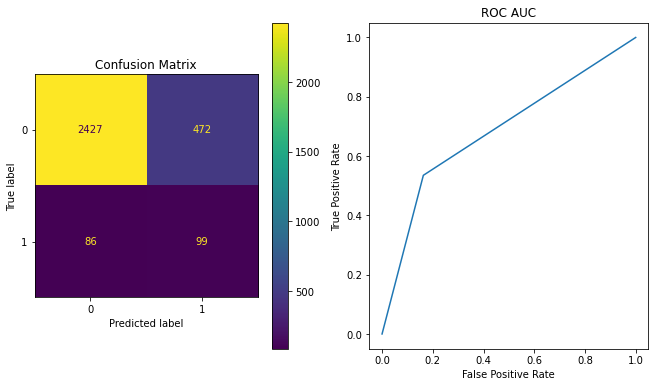

In [146]:
analysis_model_with_test('random_forest_clf_under', random_forest_clf, x_test, y_test)

#### Extra Trees

In [147]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier()

In [148]:
extra_trees_clf.fit(x_under, y_under)

ExtraTreesClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


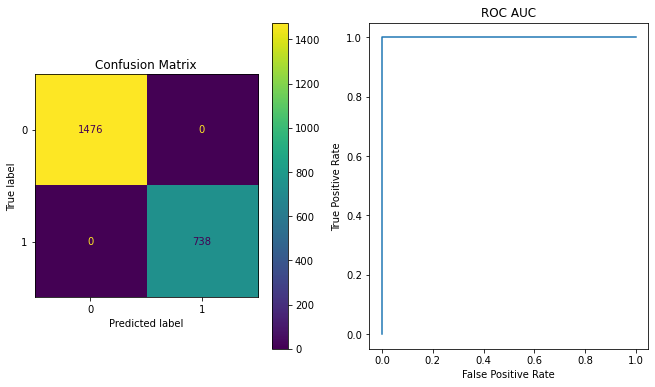

In [149]:
analysis_model_with_train('extra_trees_clf_under', extra_trees_clf, x_under, y_under)

Accuracy Score: 0.8216601815823605
F1 Score: 0.2763157894736842
Recall Score: 0.5675675675675675
Precision Score: 0.1826086956521739
ROC AUC: 0.7027213484612588


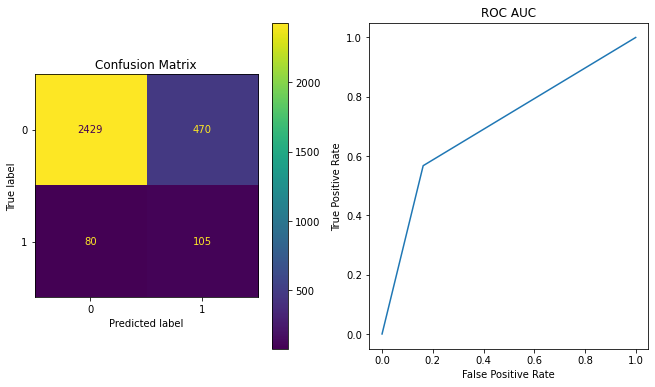

In [150]:
analysis_model_with_test('extra_trees_clf_under', extra_trees_clf, x_test, y_test)

#### KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [157]:
knn_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.8170731707317073
F1 Score: 0.7121535181236675
Recall Score: 0.6788617886178862
Precision Score: 0.7488789237668162
ROC AUC: 0.782520325203252


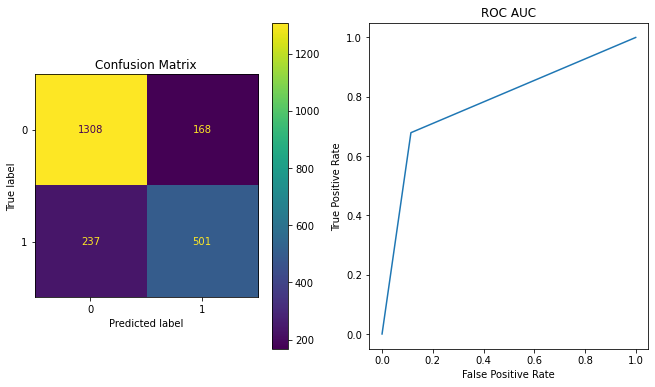

In [158]:
analysis_model_with_train('knn_clf_under', knn_clf, x_under, y_under)

Accuracy Score: 0.7892347600518806
F1 Score: 0.23708920187793425
Recall Score: 0.5459459459459459
Precision Score: 0.15142428785607195
ROC AUC: 0.6753531040526556


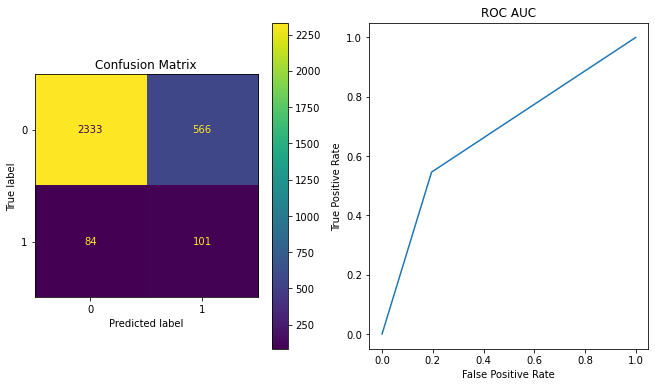

In [159]:
analysis_model_with_test('knn_clf_under', knn_clf, x_test, y_test)

### Naive Bayes

In [172]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [173]:
gaussian_nb_clf.fit(x_under, y_under)   

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.6942186088527552
F1 Score: 0.6438716465018411
Recall Score: 0.8292682926829268
Precision Score: 0.5262252794496991
ROC AUC: 0.727981029810298


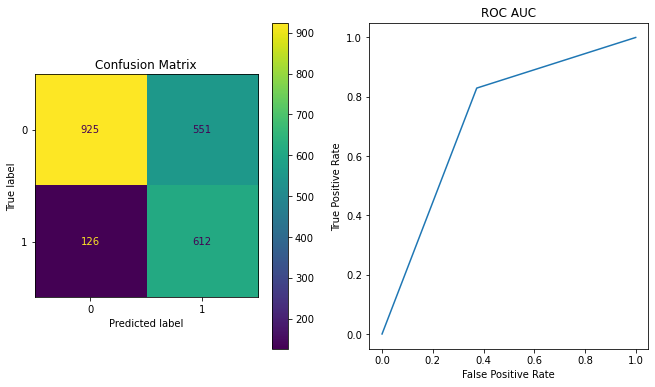

In [174]:
analysis_model_with_train('gaussian_nb_clf_under', gaussian_nb_clf, x_under, y_under)

Accuracy Score: 0.6611543450064851
F1 Score: 0.2310522442972774
Recall Score: 0.8486486486486486
Precision Score: 0.13373083475298125
ROC AUC: 0.7489190121477118


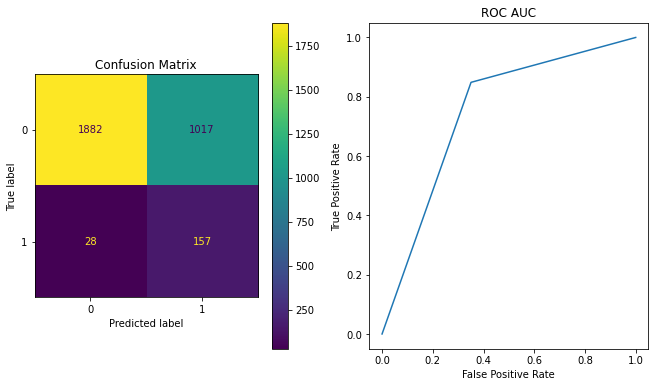

In [175]:
analysis_model_with_test('gaussian_nb_clf_under', gaussian_nb_clf, x_test, y_test)

In [189]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
ber_nb_clf = make_pipeline(StandardScaler(), BernoulliNB())

In [190]:
ber_nb_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.7068654019873533
F1 Score: 0.5551747772446881
Recall Score: 0.5487804878048781
Precision Score: 0.5617198335644937
ROC AUC: 0.6673441734417345


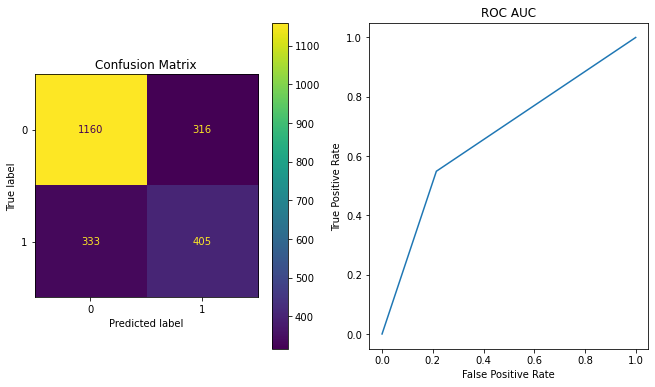

In [191]:
analysis_model_with_train('ber_nb_clf_under', ber_nb_clf, x_under, y_under)

Accuracy Score: 0.7830739299610895
F1 Score: 0.22479721900347624
Recall Score: 0.5243243243243243
Precision Score: 0.1430678466076696
ROC AUC: 0.6619551942421897


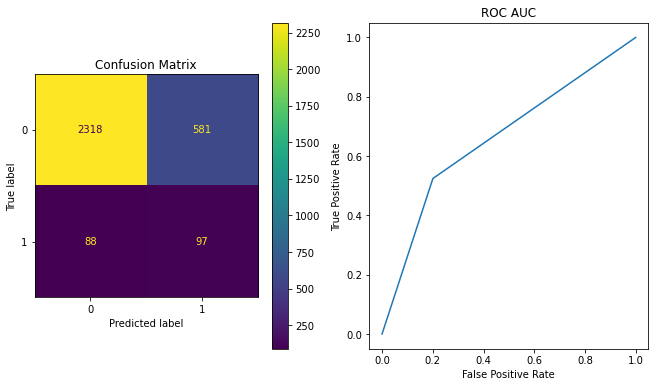

In [192]:
analysis_model_with_test('ber_nb_clf_under', ber_nb_clf, x_test, y_test)

#### AdaBoost

In [201]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.5)

In [202]:
ada_clf.fit(x_under, y_under)

AdaBoostClassifier(learning_rate=0.5, n_estimators=300)

Accuracy Score: 0.7538392050587173
F1 Score: 0.6170063246661981
Recall Score: 0.5948509485094851
Precision Score: 0.6408759124087591
ROC AUC: 0.7140921409214092


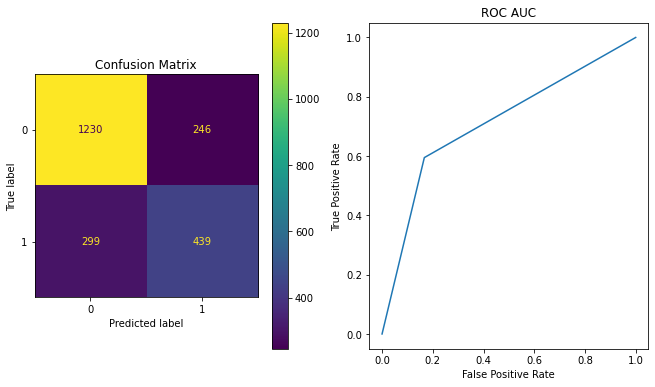

In [203]:
analysis_model_with_train('ada_clf_under', ada_clf, x_under, y_under)

Accuracy Score: 0.8028534370946823
F1 Score: 0.24189526184538654
Recall Score: 0.5243243243243243
Precision Score: 0.15721231766612642
ROC AUC: 0.6724760635074536


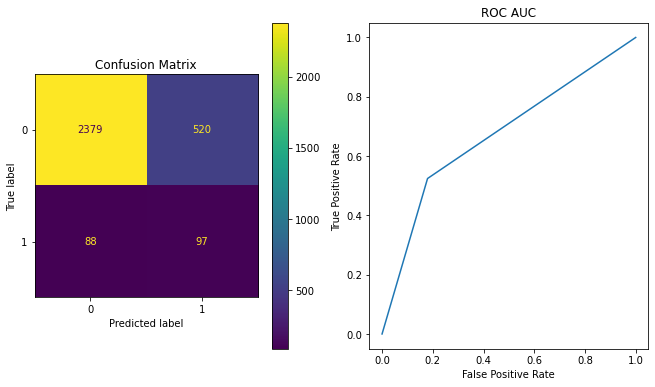

In [204]:
analysis_model_with_test('ada_clf_under', ada_clf, x_test, y_test)

#### Gradient Boosting

In [205]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [206]:
gb_clf.fit(x_under, y_under)

GradientBoostingClassifier()

Accuracy Score: 0.8238482384823849
F1 Score: 0.7249647390691113
Recall Score: 0.6964769647696477
Precision Score: 0.7558823529411764
ROC AUC: 0.7920054200542006


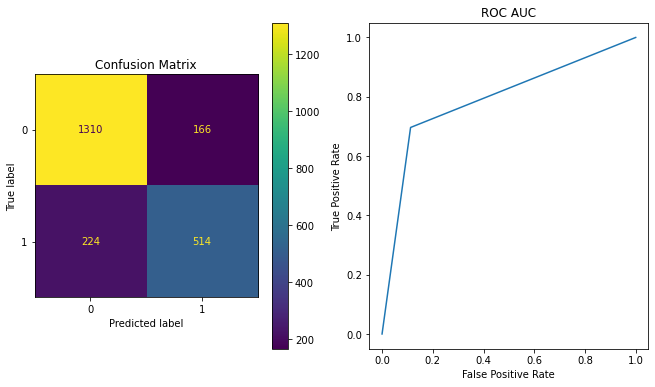

In [207]:
analysis_model_with_train('gb_clf_under', gb_clf, x_under, y_under)

Accuracy Score: 0.8180933852140078
F1 Score: 0.277992277992278
Recall Score: 0.5837837837837838
Precision Score: 0.18243243243243243
ROC AUC: 0.7084148308363556


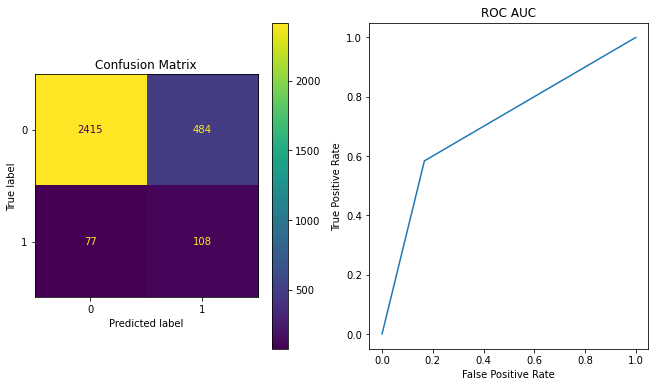

In [208]:
analysis_model_with_test('gb_clf_under', gb_clf, x_test, y_test)

#### XG Boost

In [215]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [216]:
xgb_clf.fit(x_under, y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


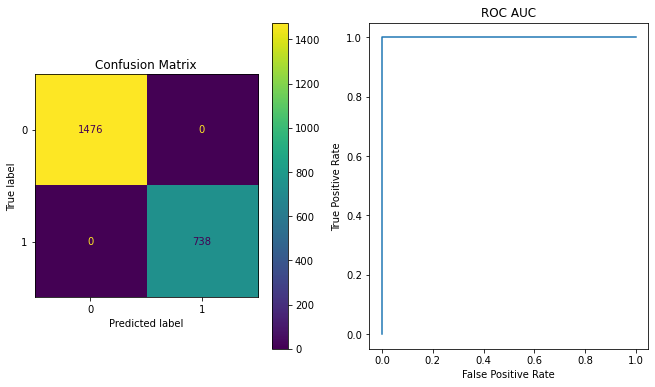

In [217]:
analysis_model_with_train('xgb_clf_under', xgb_clf, x_under, y_under)

Accuracy Score: 0.8051232166018158
F1 Score: 0.24592220828105393
Recall Score: 0.5297297297297298
Precision Score: 0.16013071895424835
ROC AUC: 0.6762136058100183


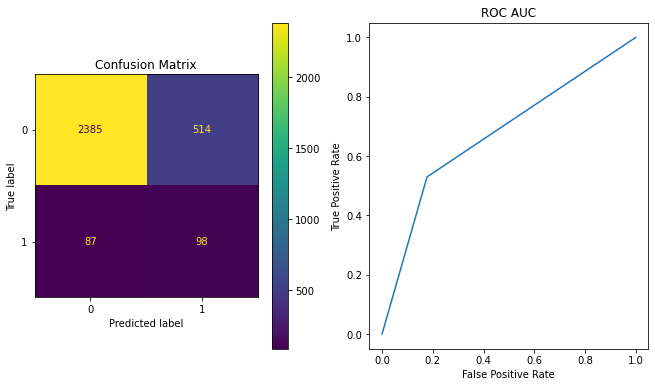

In [218]:
analysis_model_with_test('xgb_clf_under', xgb_clf, x_test, y_test)

### Training Model with Over Sampling

In [219]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42, sampling_strategy=0.5)
x_over, y_over = over_sampler.fit_resample(x_train, y_train)

#### Logistic Regression

In [220]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [221]:
logistic_model.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.7233687841333717
F1 Score: 0.5776724591890467
Recall Score: 0.5676095205243187
Precision Score: 0.5880986418870622
ROC AUC: 0.6844256104820439


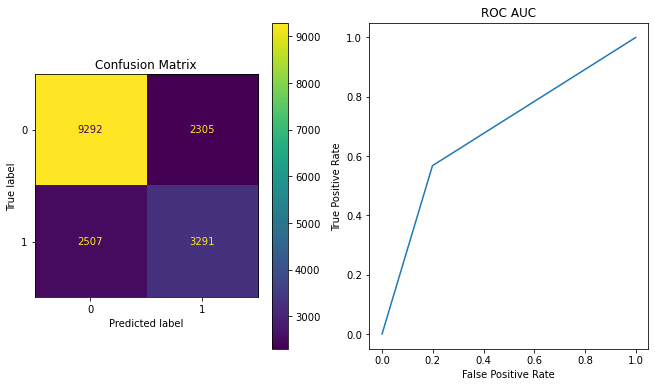

In [222]:
analysis_model_with_train('logistic_model_over', logistic_model, x_over, y_over)

Accuracy Score: 0.7795071335927367
F1 Score: 0.2290249433106576
Recall Score: 0.5459459459459459
Precision Score: 0.1449067431850789
ROC AUC: 0.6701789060533455


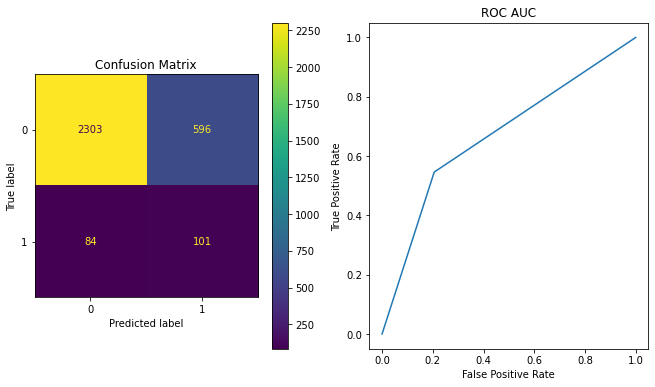

In [223]:
analysis_model_with_test('logistic_model_over', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [225]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [226]:
linearSVC_model.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.7234837597010635
F1 Score: 0.5822476984540559
Recall Score: 0.5781303897895826
Precision Score: 0.5864240727781665
ROC AUC: 0.6871422837970936


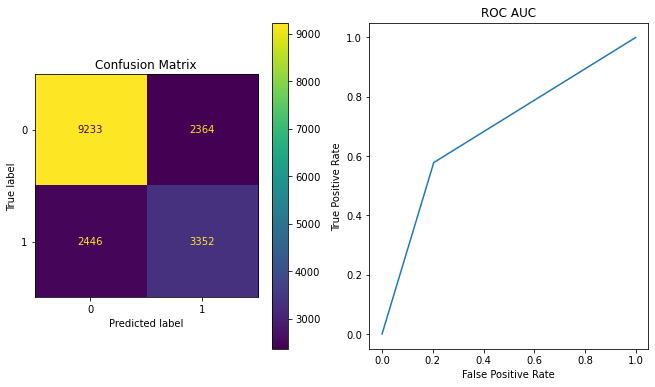

In [227]:
analysis_model_with_train('linearSVC_model_over', linearSVC_model, x_over, y_over)

Accuracy Score: 0.7759403372243839
F1 Score: 0.2330743618201998
Recall Score: 0.5675675675675675
Precision Score: 0.14664804469273743
ROC AUC: 0.6784026178645013


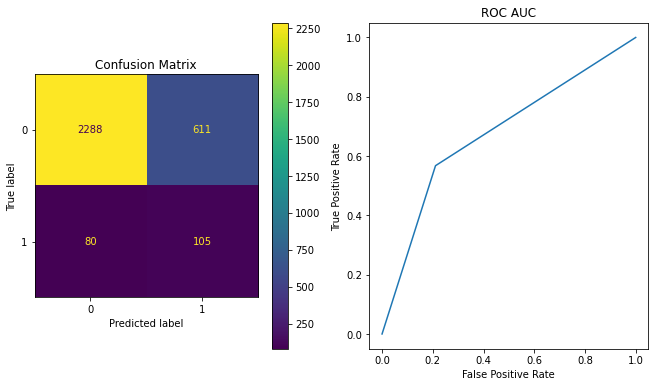

In [228]:
analysis_model_with_test('linearSVC_model_over', linearSVC_model, x_test, y_test)

#### SVC

In [230]:
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))

In [231]:
poly_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Accuracy Score: 0.9385455590686979
F1 Score: 0.9115578720939853
Recall Score: 0.9501552259399793
Precision Score: 0.8759739227222134
ROC AUC: 0.9414482260595819


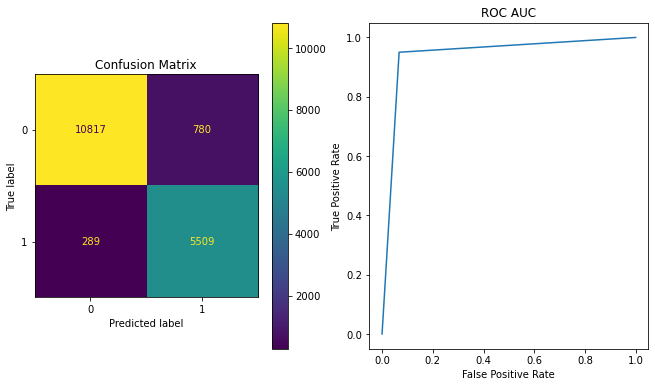

In [232]:
analysis_model_with_train('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8612191958495461
F1 Score: 0.2161172161172161
Recall Score: 0.31891891891891894
Precision Score: 0.1634349030470914
ROC AUC: 0.6073725329330711


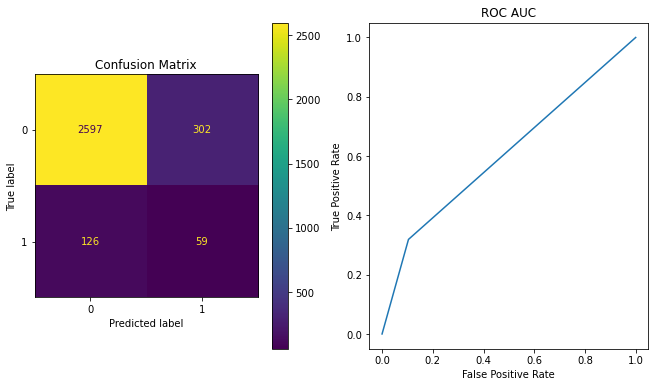

In [234]:
analysis_model_with_test('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_test, y_test)

In [238]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [239]:
rbf_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Accuracy Score: 0.8942224777234837
F1 Score: 0.8461023753763801
Recall Score: 0.872369782683684
Precision Score: 0.8213705748619682
ROC AUC: 0.8887588328784464


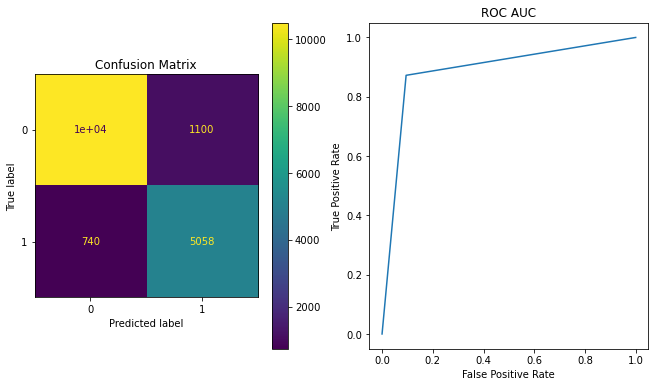

In [240]:
analysis_model_with_train('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8576523994811932
F1 Score: 0.252129471890971
Recall Score: 0.4
Precision Score: 0.18407960199004975
ROC AUC: 0.643428768540876


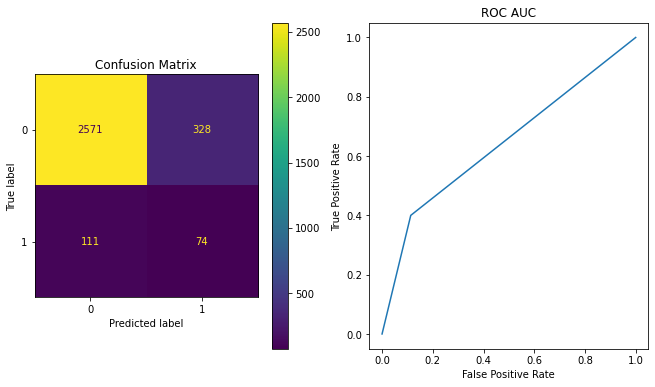

In [241]:
analysis_model_with_test('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_test, y_test)

In [242]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))

In [243]:
sigmoid_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid'))])

Accuracy Score: 0.6403564242598447
F1 Score: 0.45180511742025936
Recall Score: 0.44463608140738187
Precision Score: 0.4592091200570004
ROC AUC: 0.5914221193447187


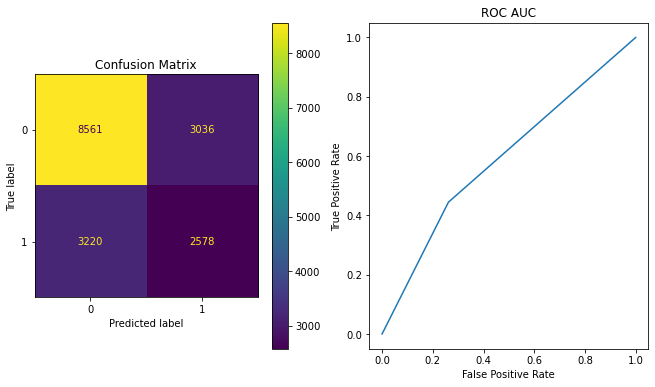

In [244]:
analysis_model_with_train('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.7311932555123216
F1 Score: 0.17839444995044598
Recall Score: 0.4864864864864865
Precision Score: 0.10922330097087378
ROC AUC: 0.6166478655267893


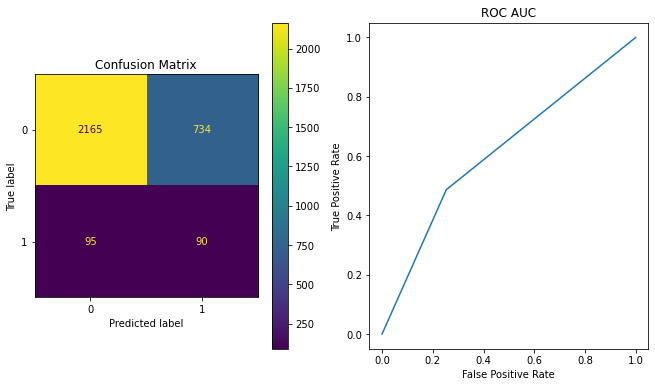

In [245]:
analysis_model_with_test('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_test, y_test)

#### Decision Tree

In [248]:
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [249]:
decision_tree_clf.fit(x_over, y_over)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.6911181373958034
F1 Score: 0.6644182124789207
Recall Score: 0.9173853052776819
Precision Score: 0.5208068148438265
ROC AUC: 0.7476898070753332


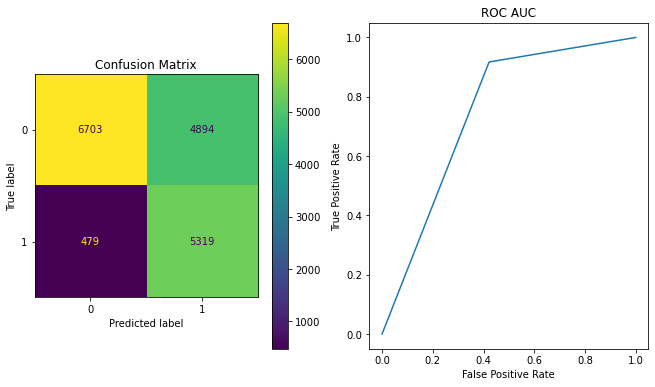

In [250]:
analysis_model_with_train('decision_tree_clf_over', decision_tree_clf, x_over, y_over)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


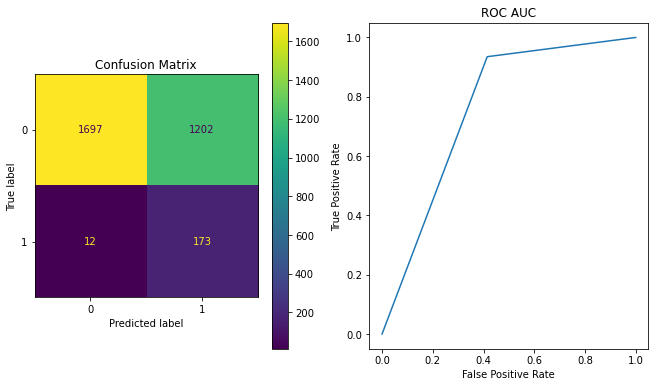

In [251]:
analysis_model_with_test('decision_tree_clf_over', decision_tree_clf, x_test, y_test)

#### Random Forest

In [293]:
random_forest_clf = RandomForestClassifier(max_depth=17)

In [294]:
random_forest_clf.fit(x_over, y_over) 

RandomForestClassifier(max_depth=17)

Accuracy Score: 0.9995400977292326
F1 Score: 0.9993105825577386
Recall Score: 1.0
Precision Score: 0.998622115053393
ROC AUC: 0.9996550832111752


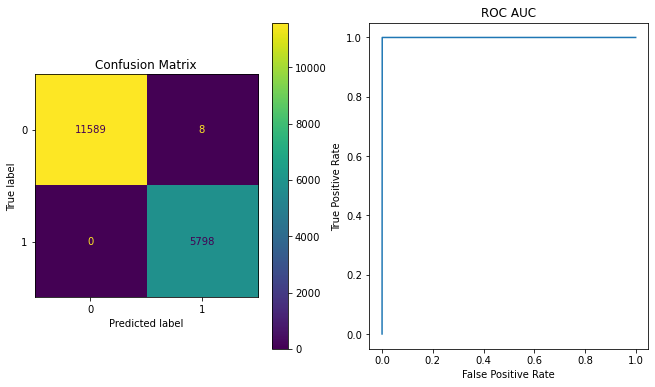

In [295]:
analysis_model_with_train('random_forest_clf_over', random_forest_clf, x_over, y_over)

Accuracy Score: 0.937094682230869
F1 Score: 0.11009174311926606
Recall Score: 0.06486486486486487
Precision Score: 0.36363636363636365
ROC AUC: 0.5288104938329153


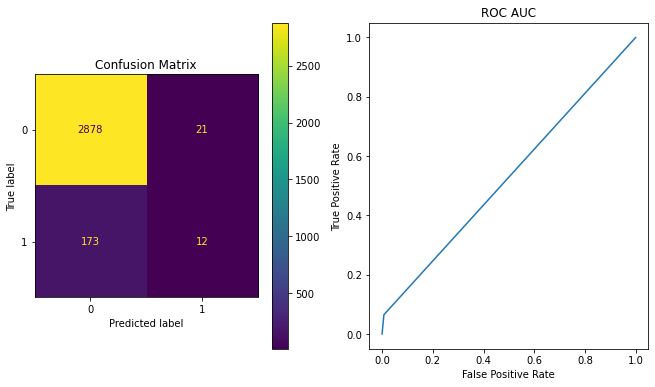

In [296]:
analysis_model_with_test('random_forest_clf_over', random_forest_clf, x_test, y_test)

#### Extra Trees

In [305]:
extra_trees_clf = ExtraTreesClassifier(max_depth=12)

In [306]:
extra_trees_clf.fit(x_over, y_over)

ExtraTreesClassifier(max_depth=12)

Accuracy Score: 0.9061799367634378
F1 Score: 0.8529994595568366
Recall Score: 0.8166609175577786
Precision Score: 0.8927224736048266
ROC AUC: 0.8837982521737329


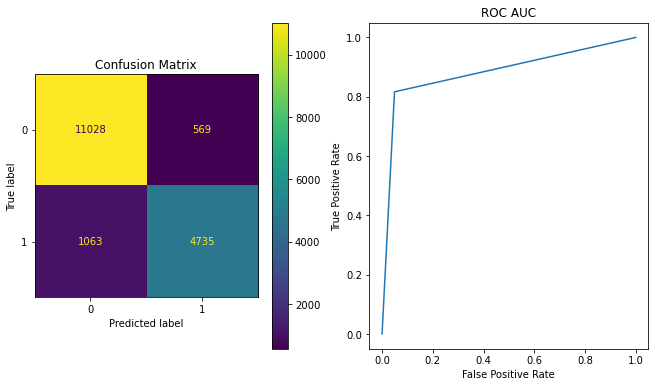

In [307]:
analysis_model_with_train('extra_trees_clf_over', extra_trees_clf, x_over, y_over)

Accuracy Score: 0.893644617380026
F1 Score: 0.2545454545454546
Recall Score: 0.3027027027027027
Precision Score: 0.2196078431372549
ROC AUC: 0.6170291712892609


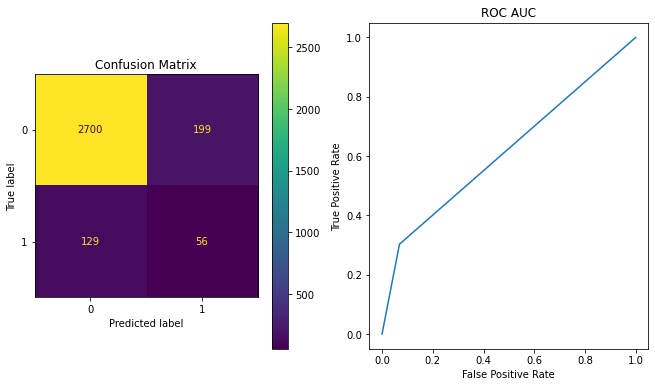

In [308]:
analysis_model_with_test('extra_trees_clf_over', extra_trees_clf, x_test, y_test)

#### KNN

In [309]:
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [310]:
knn_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.933314170738718
F1 Score: 0.9089767733835529
Recall Score: 0.9989651604001379
Precision Score: 0.8338612150878203
ROC AUC: 0.9497283334121066


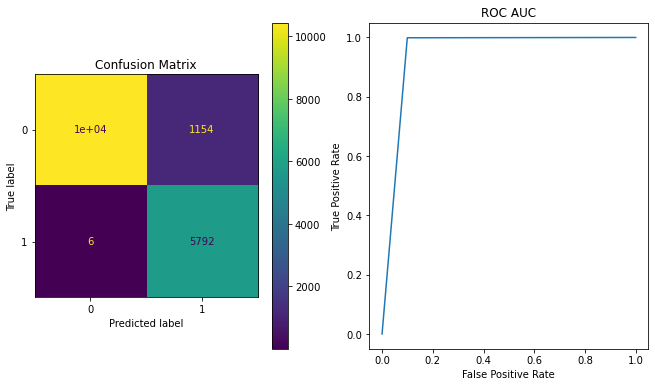

In [311]:
analysis_model_with_train('knn_clf_over', knn_clf, x_over, y_over)

Accuracy Score: 0.8359273670557718
F1 Score: 0.20689655172413796
Recall Score: 0.3567567567567568
Precision Score: 0.1456953642384106
ROC AUC: 0.6116312241872779


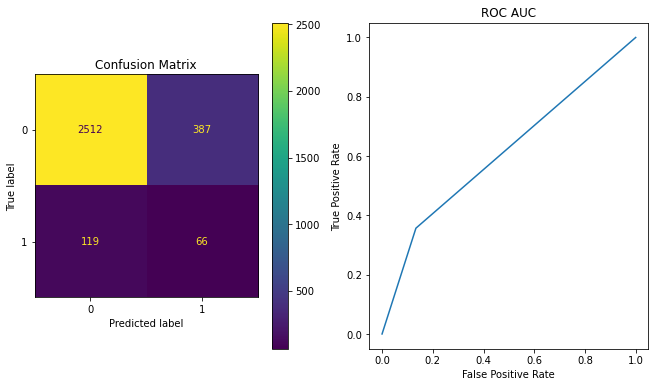

In [312]:
analysis_model_with_test('knn_clf_over', knn_clf, x_test, y_test)

#### Naive Bayes

In [313]:
# Gaussian NB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [314]:
gaussian_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.6901408450704225
F1 Score: 0.6490885416666666
Recall Score: 0.8597792342186961
Precision Score: 0.5213344488600711
ROC AUC: 0.7325540993030188


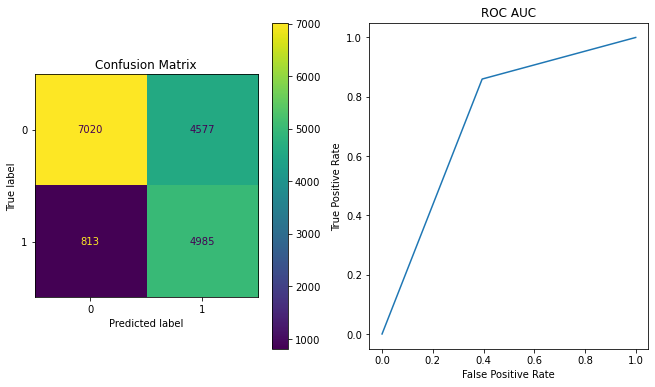

In [315]:
analysis_model_with_train('gaussian_nb_clf_over', gaussian_nb_clf, x_over, y_over)

Accuracy Score: 0.6332684824902723
F1 Score: 0.2216104611149346
Recall Score: 0.8702702702702703
Precision Score: 0.12697160883280756
ROC AUC: 0.7442072289605923


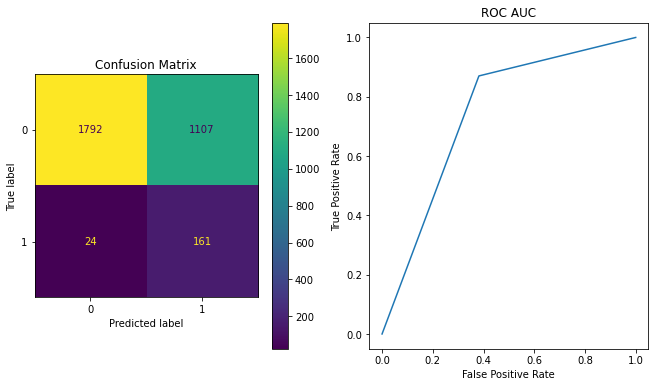

In [316]:
analysis_model_with_test('gaussian_nb_clf_over', gaussian_nb_clf, x_test, y_test)

In [317]:
# Bernoulli NB
ber_nb_clf = make_pipeline(StandardScaler(),  BernoulliNB())

In [318]:
ber_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.7134233975280253
F1 Score: 0.5655773420479302
Recall Score: 0.5596757502587099
Precision Score: 0.5716047208032411
ROC AUC: 0.6749831713266473


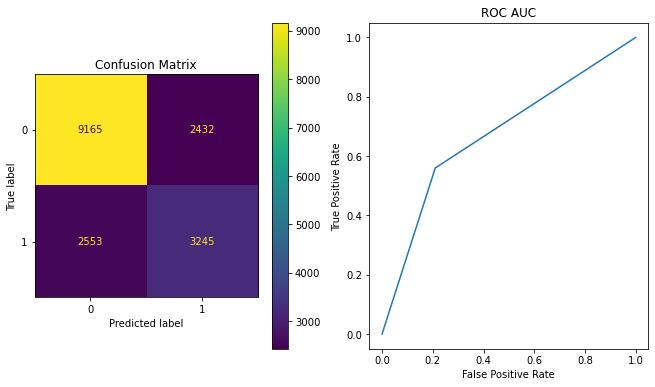

In [319]:
analysis_model_with_train('ber_nb_clf_over', ber_nb_clf, x_over, y_over)

#### Ada Boost

In [320]:
ada_clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.5)

In [321]:
ada_clf.fit(x_over, y_over)

AdaBoostClassifier(learning_rate=0.5, n_estimators=300)

Accuracy Score: 0.7485484334578902
F1 Score: 0.6065839179708581
Recall Score: 0.581579855122456
Precision Score: 0.6338345864661654
ROC AUC: 0.7068026894824145


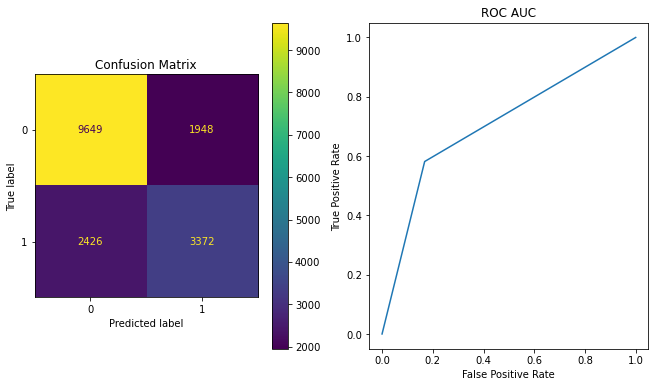

In [322]:
analysis_model_with_train('ada_clf_over', ada_clf, x_over, y_over)

Accuracy Score: 0.8054474708171206
F1 Score: 0.21465968586387432
Recall Score: 0.44324324324324327
Precision Score: 0.14162348877374784
ROC AUC: 0.6359024080997174


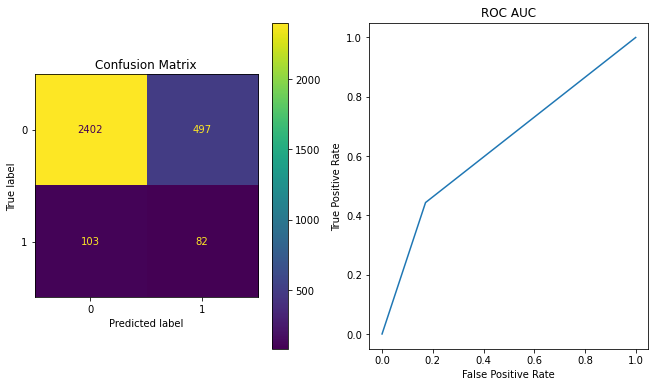

In [323]:
analysis_model_with_test('ada_clf_over', ada_clf, x_test, y_test)

#### Gradient Boosting

In [324]:
gb_clf = GradientBoostingClassifier()

In [325]:
gb_clf.fit(x_over, y_over)

GradientBoostingClassifier()

Accuracy Score: 0.8083357286576602
F1 Score: 0.7110918544194108
Recall Score: 0.707657813038979
Precision Score: 0.7145593869731801
ROC AUC: 0.7831640794090299


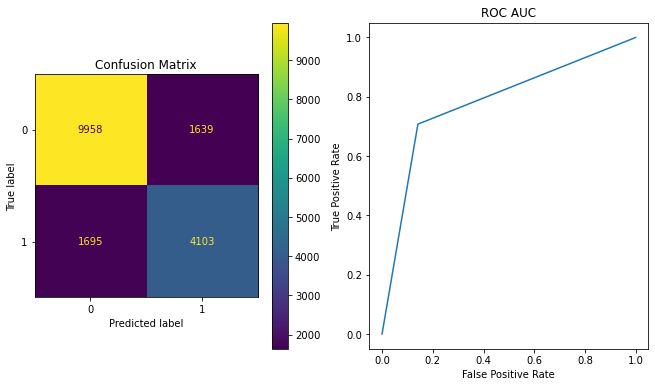

In [326]:
analysis_model_with_train('gb_clf_over', gb_clf, x_over, y_over)

Accuracy Score: 0.8294422827496758
F1 Score: 0.26536312849162014
Recall Score: 0.5135135135135135
Precision Score: 0.17890772128060264
ROC AUC: 0.6815584125001166


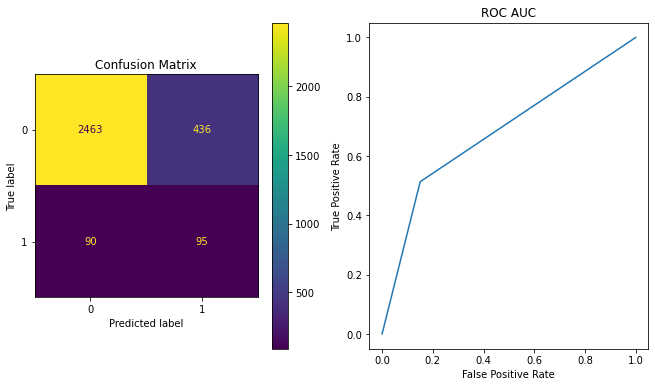

In [327]:
analysis_model_with_test('gb_clf_over', gb_clf, x_test, y_test)

#### XG Boost

In [328]:
xgb_clf = XGBClassifier()

In [329]:
xgb_clf.fit(x_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 0.9936188559931015
F1 Score: 0.9905071410245445
Recall Score: 0.9987926871334943
Precision Score: 0.9823579304495335
ROC AUC: 0.9949124253120262


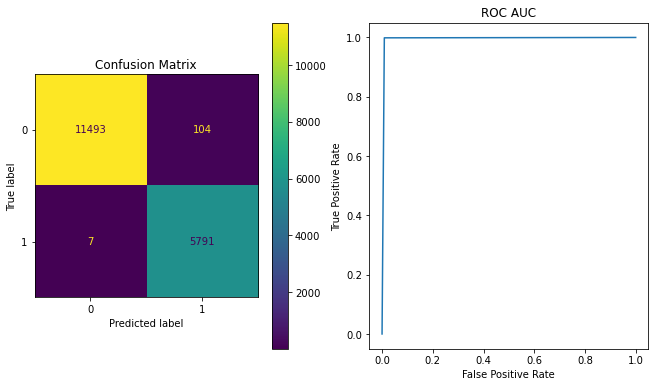

In [330]:
analysis_model_with_train('xgb_clf_over', xgb_clf, x_over, y_over)

Accuracy Score: 0.9914065666801783
F1 Score: 0.9328263624841571
Recall Score: 0.997289972899729
Precision Score: 0.8761904761904762
ROC AUC: 0.9941610681951435


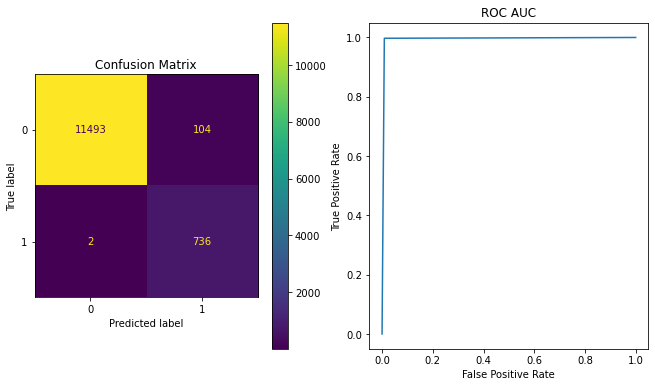

In [333]:
analysis_model_with_test('xgb_clf_over', xgb_clf, x_train, y_train)